In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('ds_salaries.csv')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.shape

(3755, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [8]:
df["work_year"].value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sns.set_theme()
sns.set(rc = {"figure.figsize":(10,6), "figure.dpi":300})

In [11]:
# Filtering
jobs = df[df['work_year']==2023]['job_title'].value_counts().nlargest(10).reset_index()
jobs

,job_title,count
0,Data Engineer,499
1,Data Scientist,370
2,Data Analyst,307
3,Machine Learning Engineer,158
4,Research Scientist,55
5,Data Architect,52
6,Analytics Engineer,46
7,Applied Scientist,40
8,Research Engineer,32
9,Data Manager,22


[Text(0, 2, '499'),
 Text(0, 2, '370'),
 Text(0, 2, '307'),
 Text(0, 2, '158'),
 Text(0, 2, '55'),
 Text(0, 2, '52'),
 Text(0, 2, '46'),
 Text(0, 2, '40'),
 Text(0, 2, '32'),
 Text(0, 2, '22')]

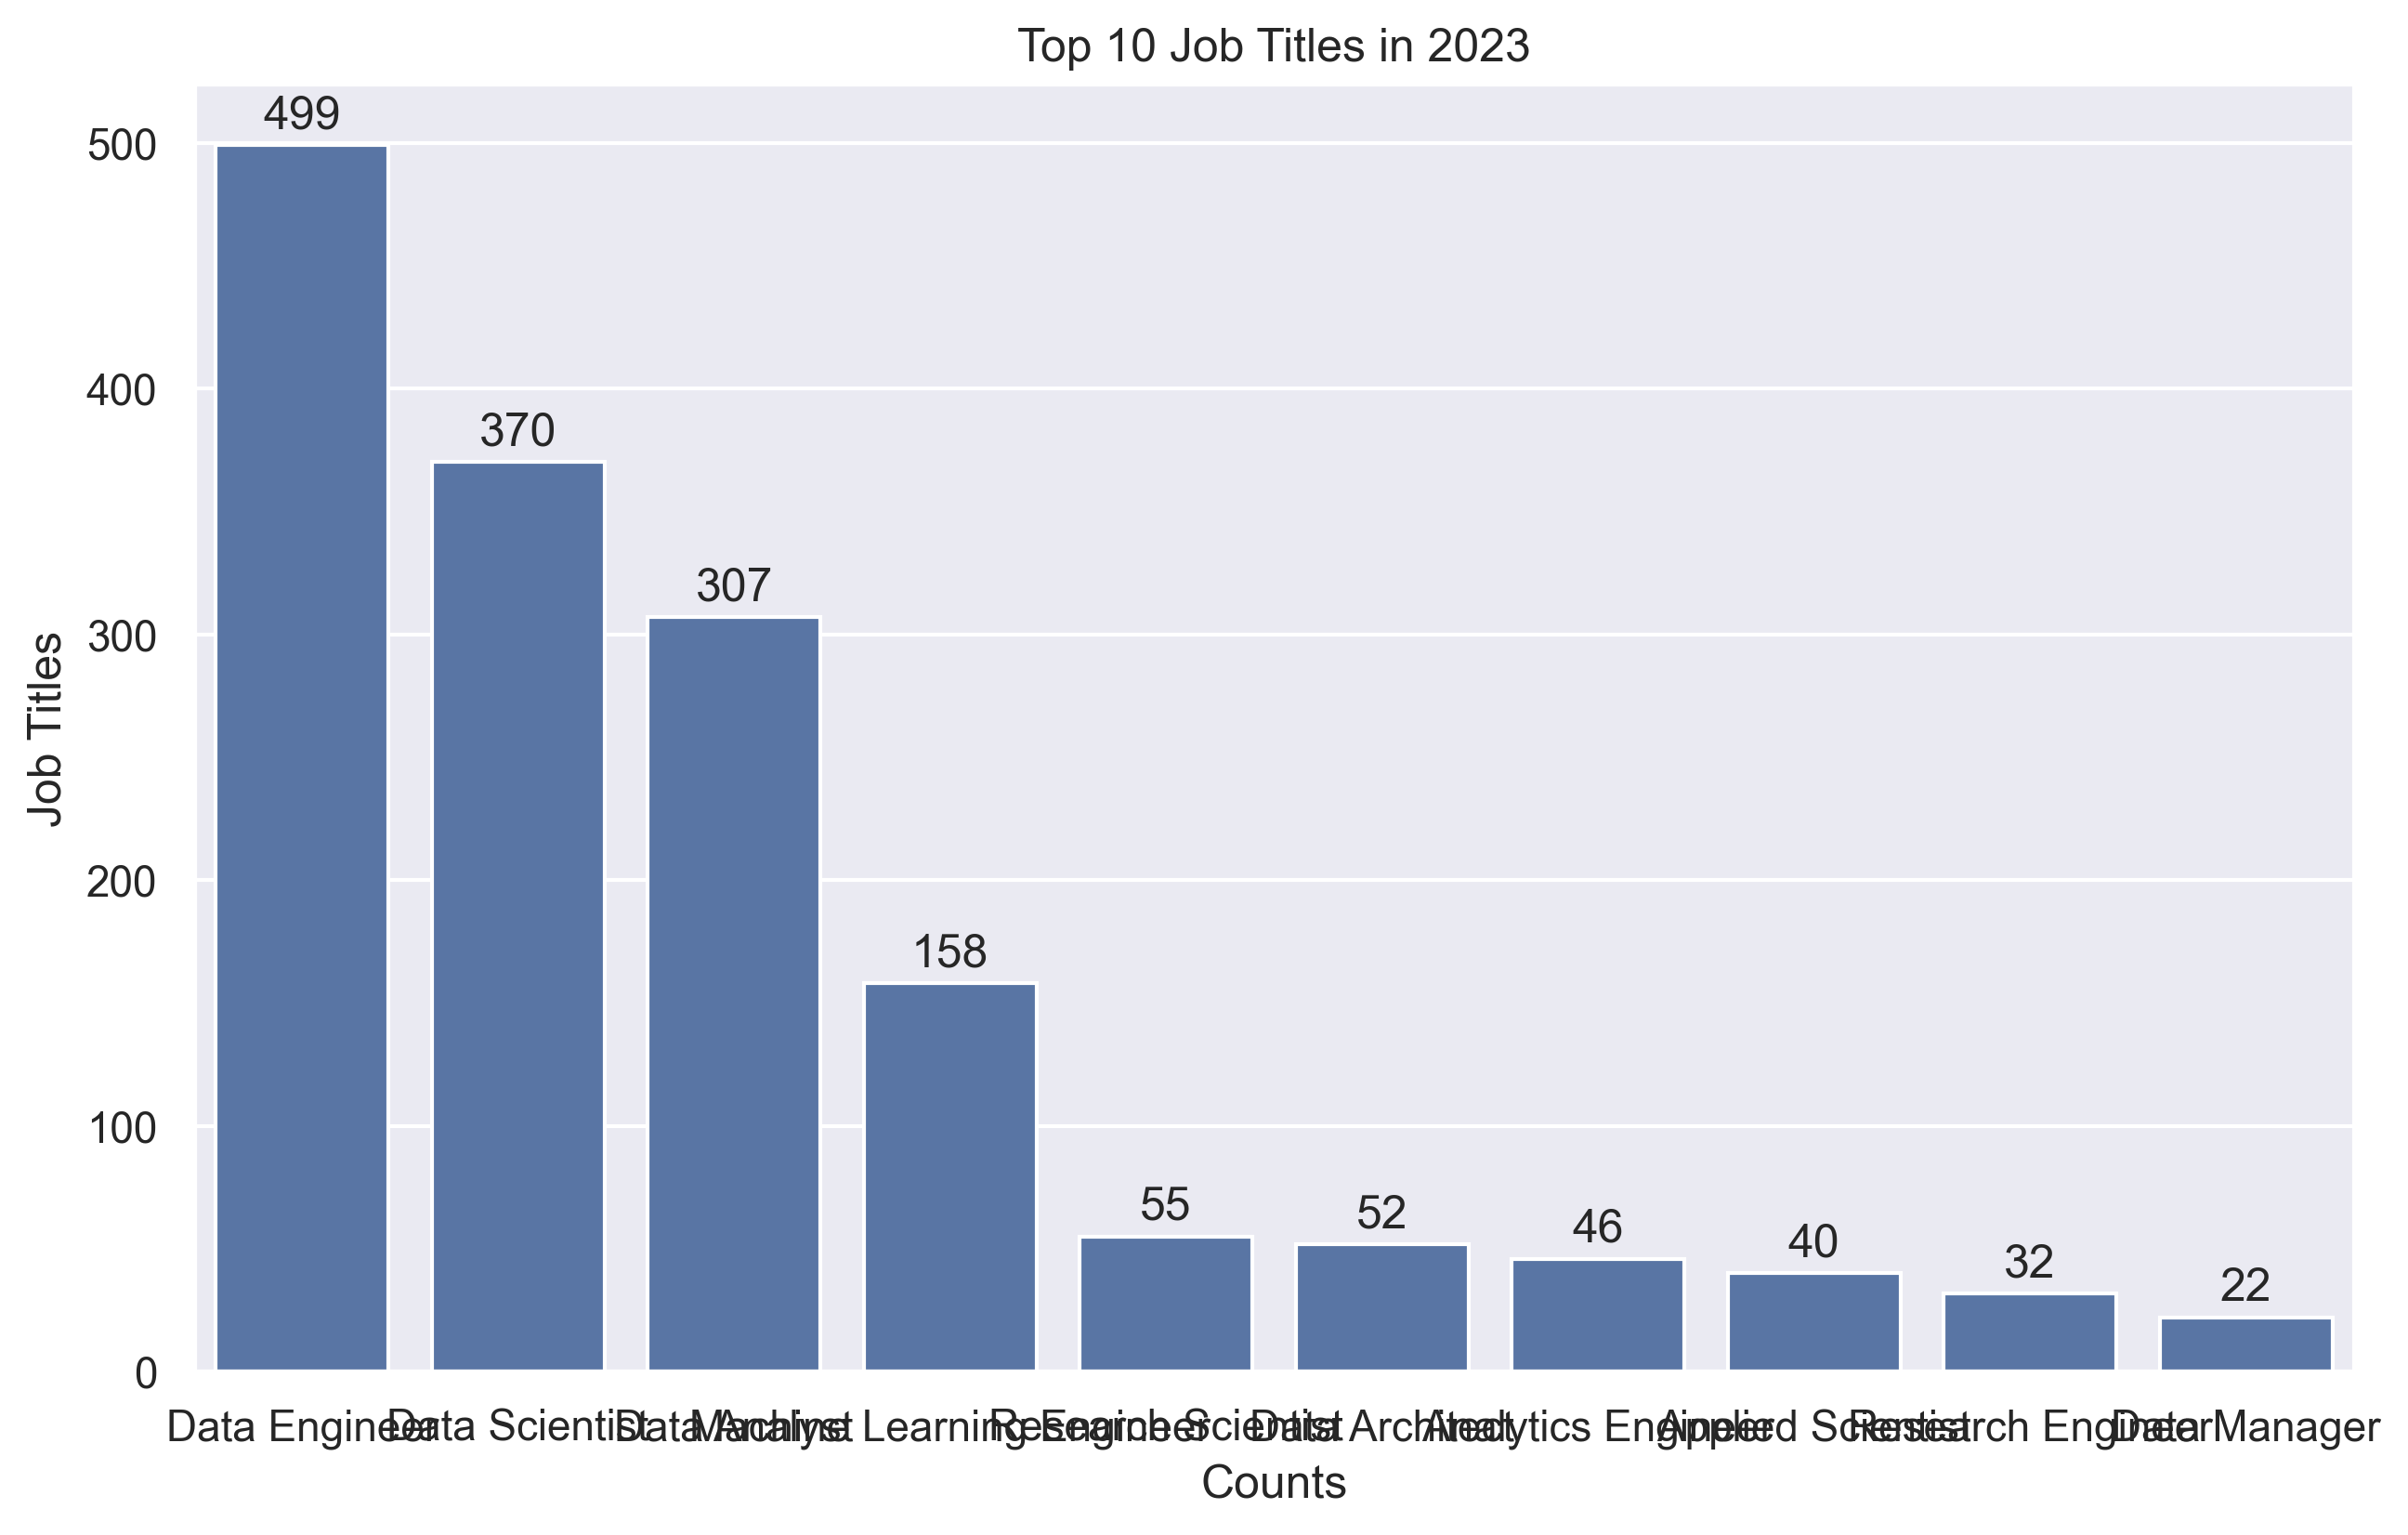

In [13]:
# Creating graphic objects
fig, ax = plt.subplots()
# Drawing the barplot
ax = sns.barplot(ax = ax, data=jobs, y = jobs['count'], x = jobs.job_title)
# Setting the labels
ax.set(ylabel='Job Titles',xlabel='Counts', title='Top 10 Job Titles in 2023')
# Adding labels to the bars in the plot
ax.bar_label(ax.containers[0], padding = 2)

In [14]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [15]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

[Text(0, 0, '2516'), Text(0, 0, '805'), Text(0, 0, '320'), Text(0, 0, '114')]

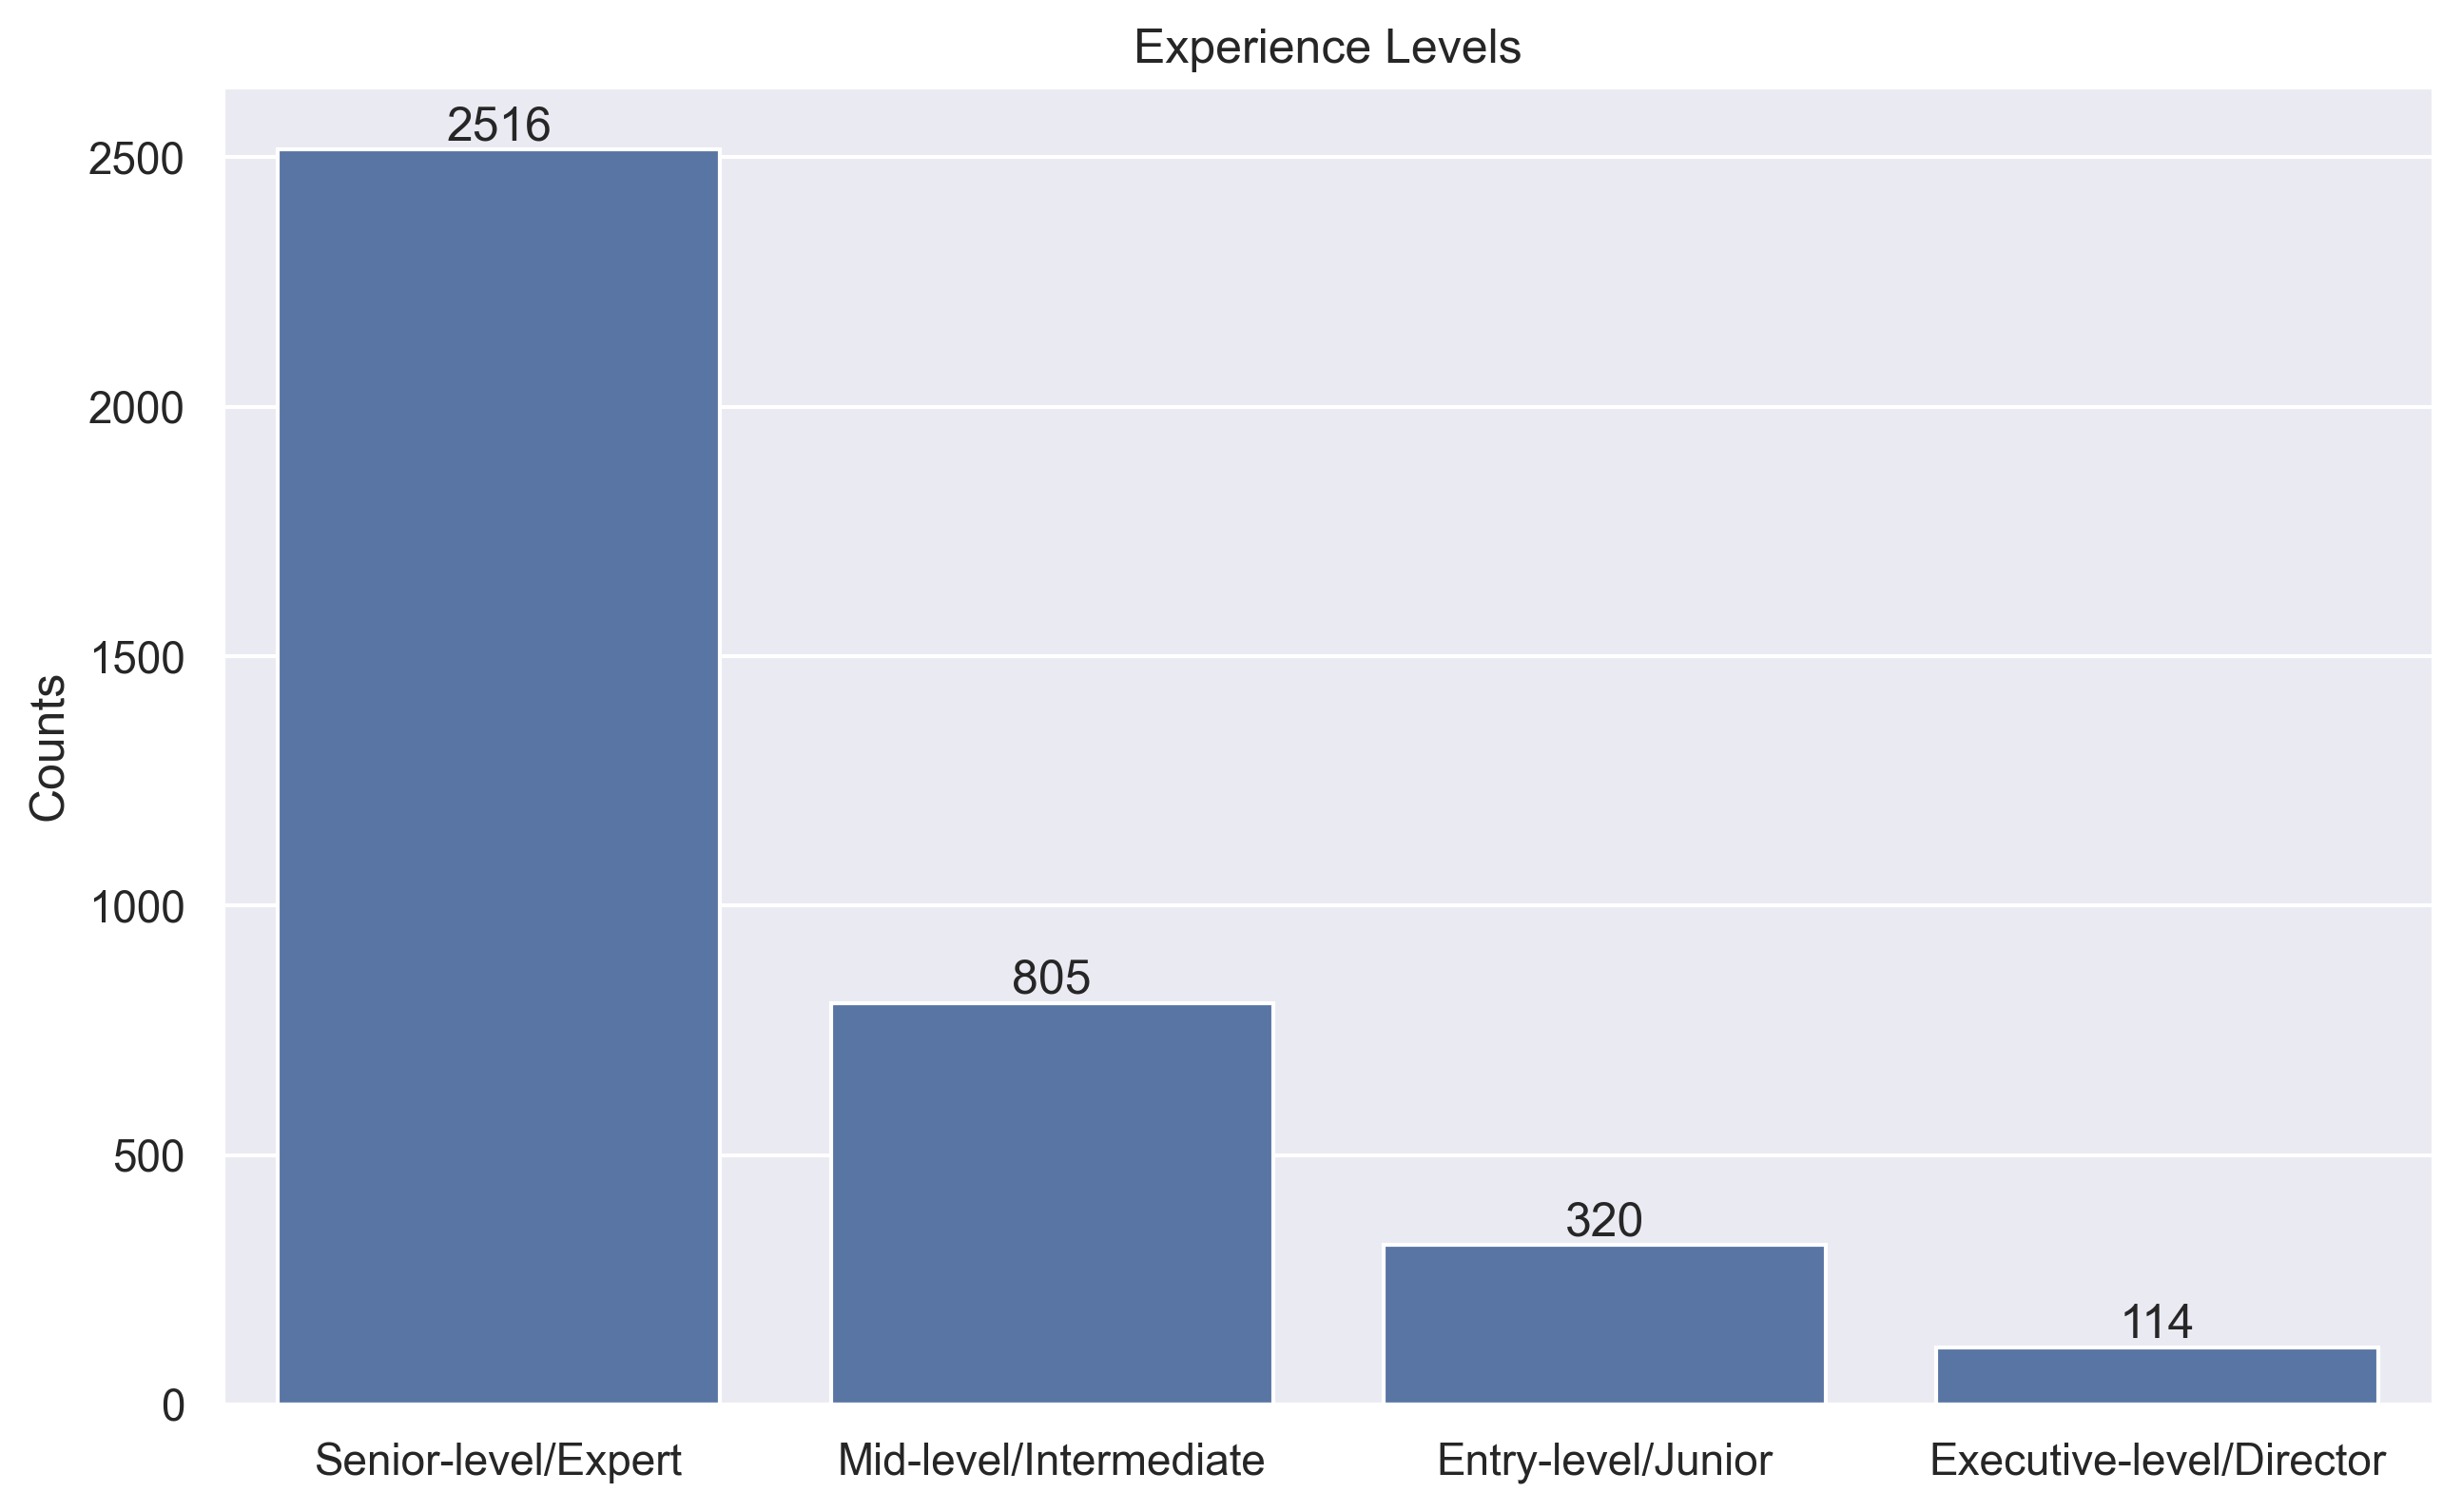

In [16]:
# Creating graphic objects
fig, ax = plt.subplots()
# Calculating values for each category 
sns.countplot(ax = ax, data = df, x = df.experience_level)
# Setting the labels
ax.set(xlabel='', ylabel='Counts', title='Experience Levels')
# Adding labels to the bars in the plot
ax.bar_label(ax.containers[0])

In [17]:
df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [18]:
df['employment_type'] = df['employment_type'].replace('FT','Full-Time')
df['employment_type'] = df['employment_type'].replace('PT','Part-Time')
df['employment_type'] = df['employment_type'].replace('CT','Contract')
df['employment_type'] = df['employment_type'].replace('FL','Freelance')

[Text(0, 0, '113'), Text(0, 0, '1')]

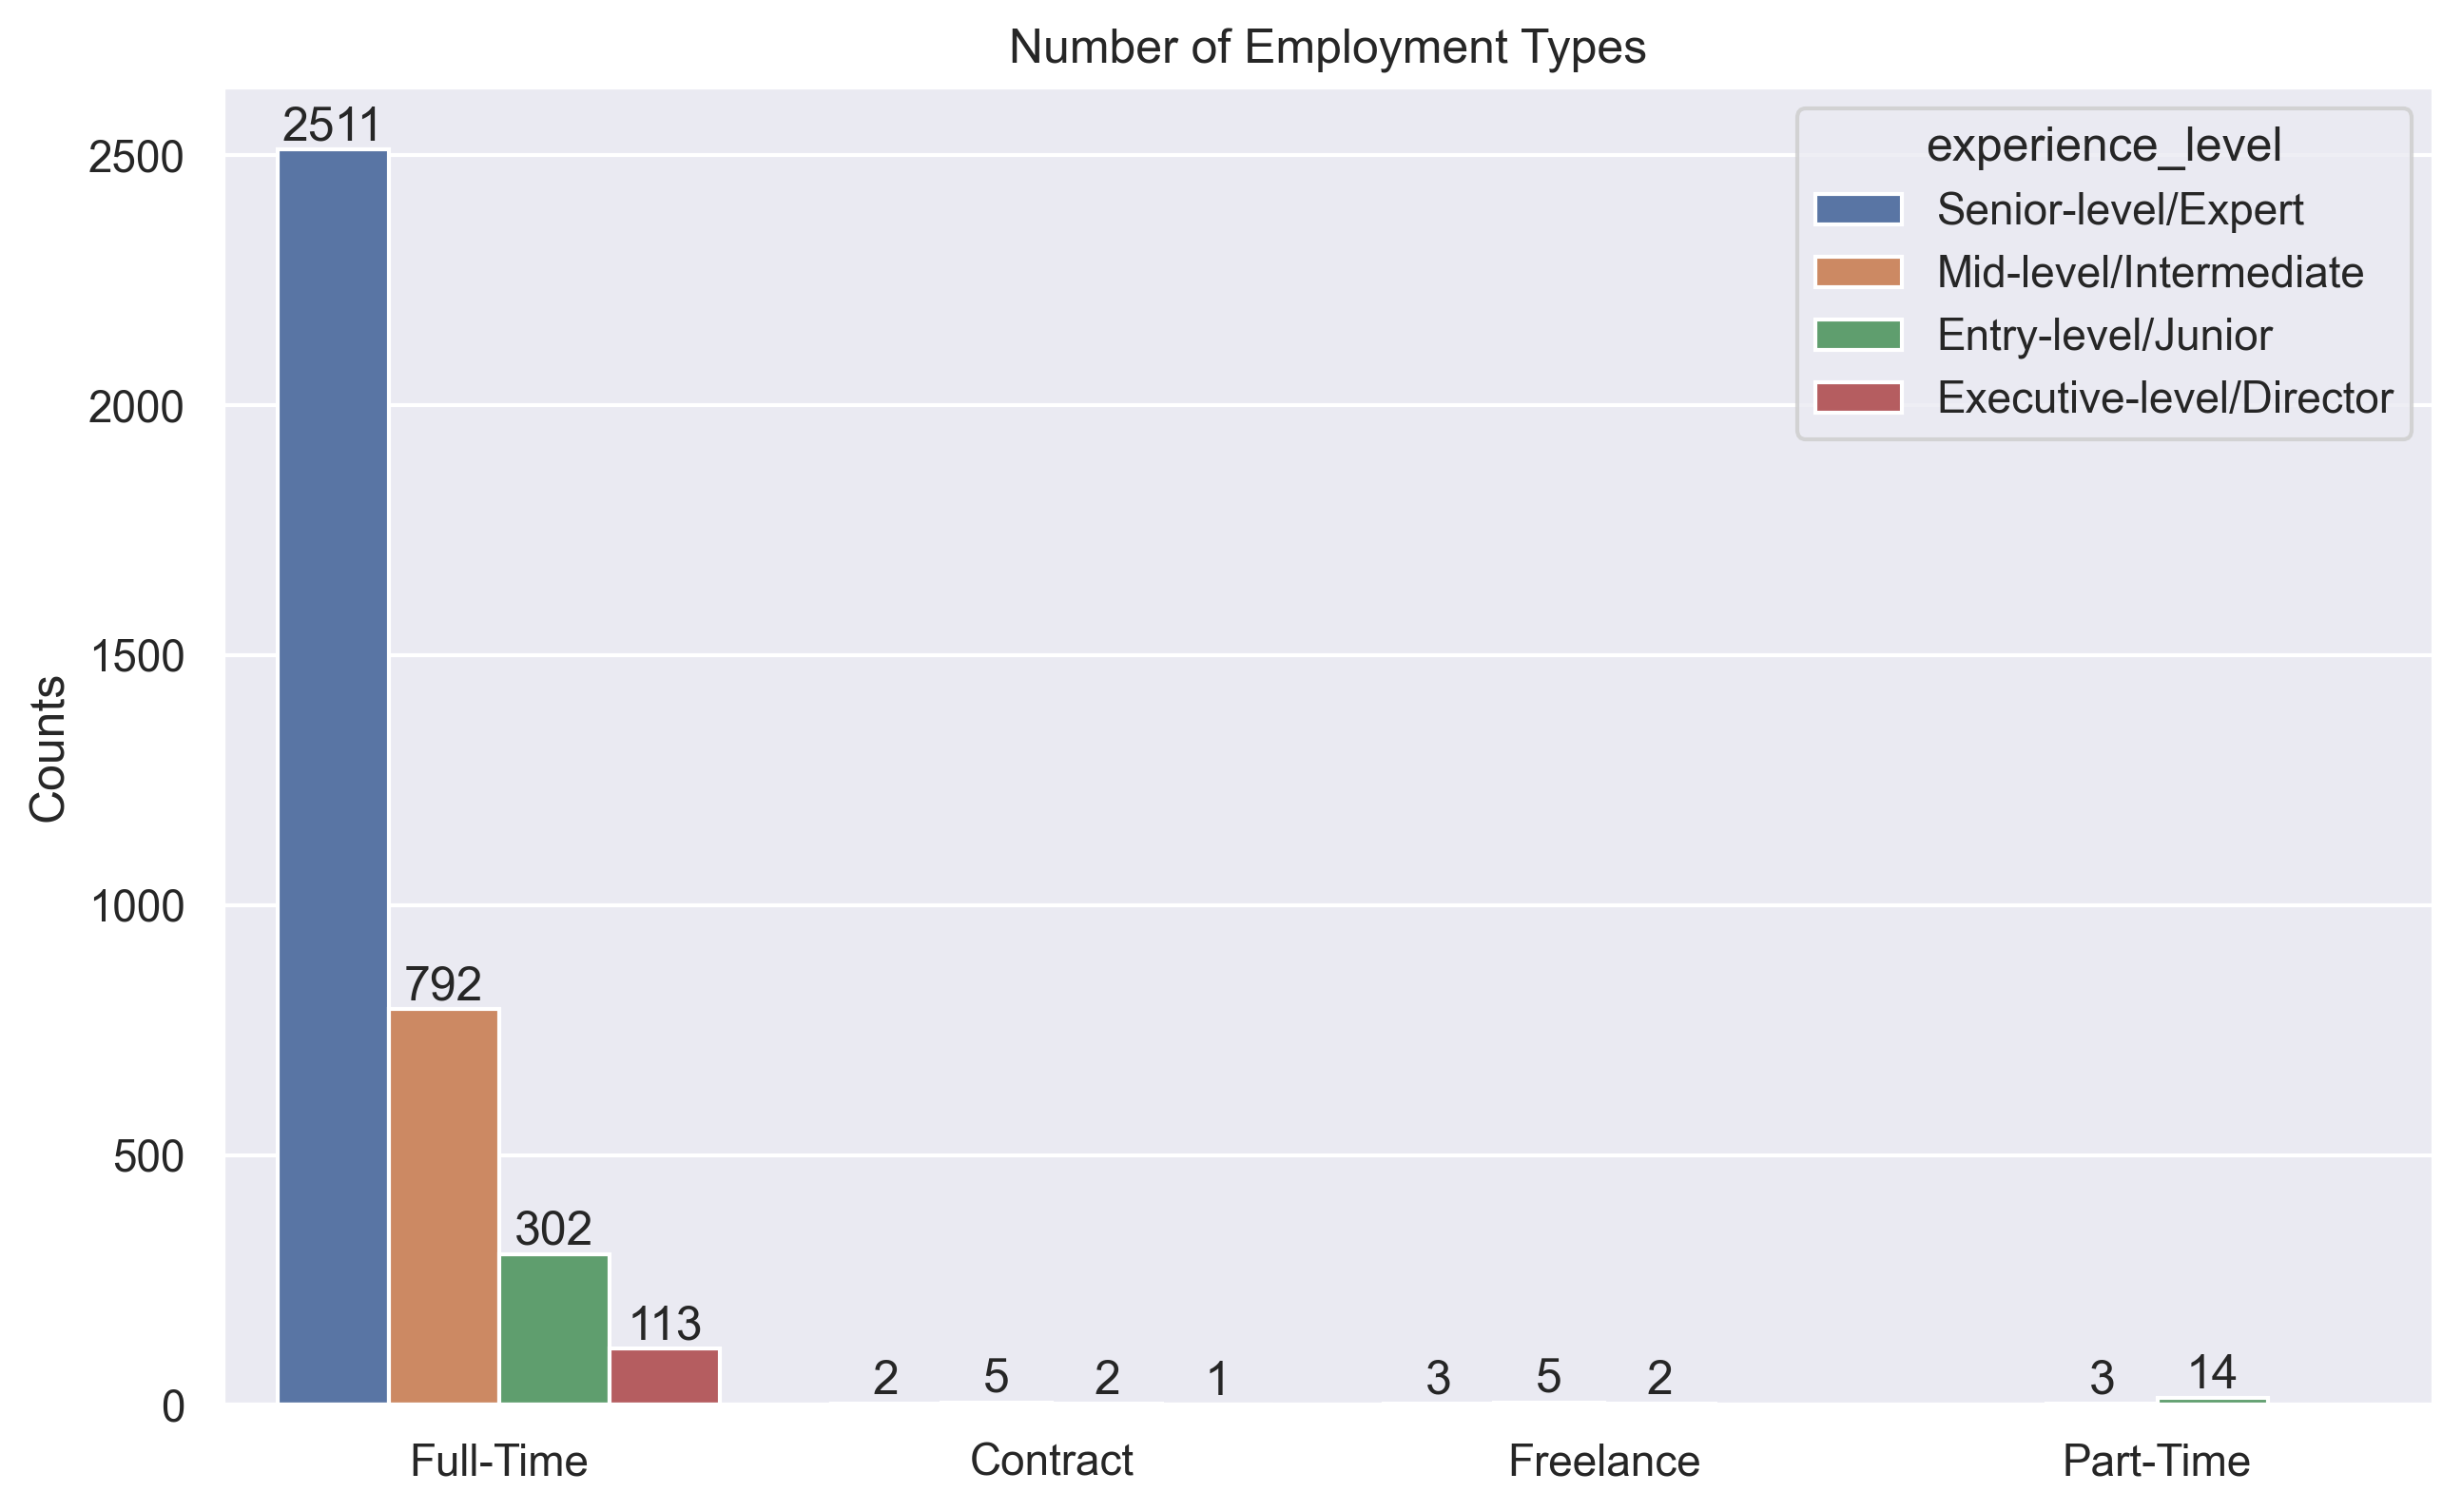

In [19]:
# Creating graphic objects
fig, ax = plt.subplots()
# Calculating values for each category
sns.countplot(ax = ax, data = df, x = df.employment_type, hue = 'experience_level')
# Setting the labels
ax.set(xlabel='', ylabel='Counts', title='Number of Employment Types')
# Adding labels to the bars in the plot
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])

In [20]:
# Filtering and grouping
job_title_salary = df['salary_in_usd'].groupby(df['job_title']).mean().round(0).nlargest(15).sort_values(ascending = False).reset_index()
job_title_salary

,job_title,salary_in_usd
0,Data Science Tech Lead,375000.0
1,Cloud Data Architect,250000.0
2,Data Lead,212500.0
3,Data Analytics Lead,211254.0
4,Principal Data Scientist,198171.0
5,Director of Data Science,195141.0
6,Principal Data Engineer,192500.0
7,Machine Learning Software Engineer,192420.0
8,Data Science Manager,191279.0
9,Applied Scientist,190264.0


[Text(2, 0, '375000'),
 Text(2, 0, '250000'),
 Text(2, 0, '212500'),
 Text(2, 0, '211254'),
 Text(2, 0, '198171'),
 Text(2, 0, '195141'),
 Text(2, 0, '192500'),
 Text(2, 0, '192420'),
 Text(2, 0, '191279'),
 Text(2, 0, '190264'),
 Text(2, 0, '190000'),
 Text(2, 0, '183858'),
 Text(2, 0, '175052'),
 Text(2, 0, '174150'),
 Text(2, 0, '163220')]

<Figure size 7500x2700 with 0 Axes>

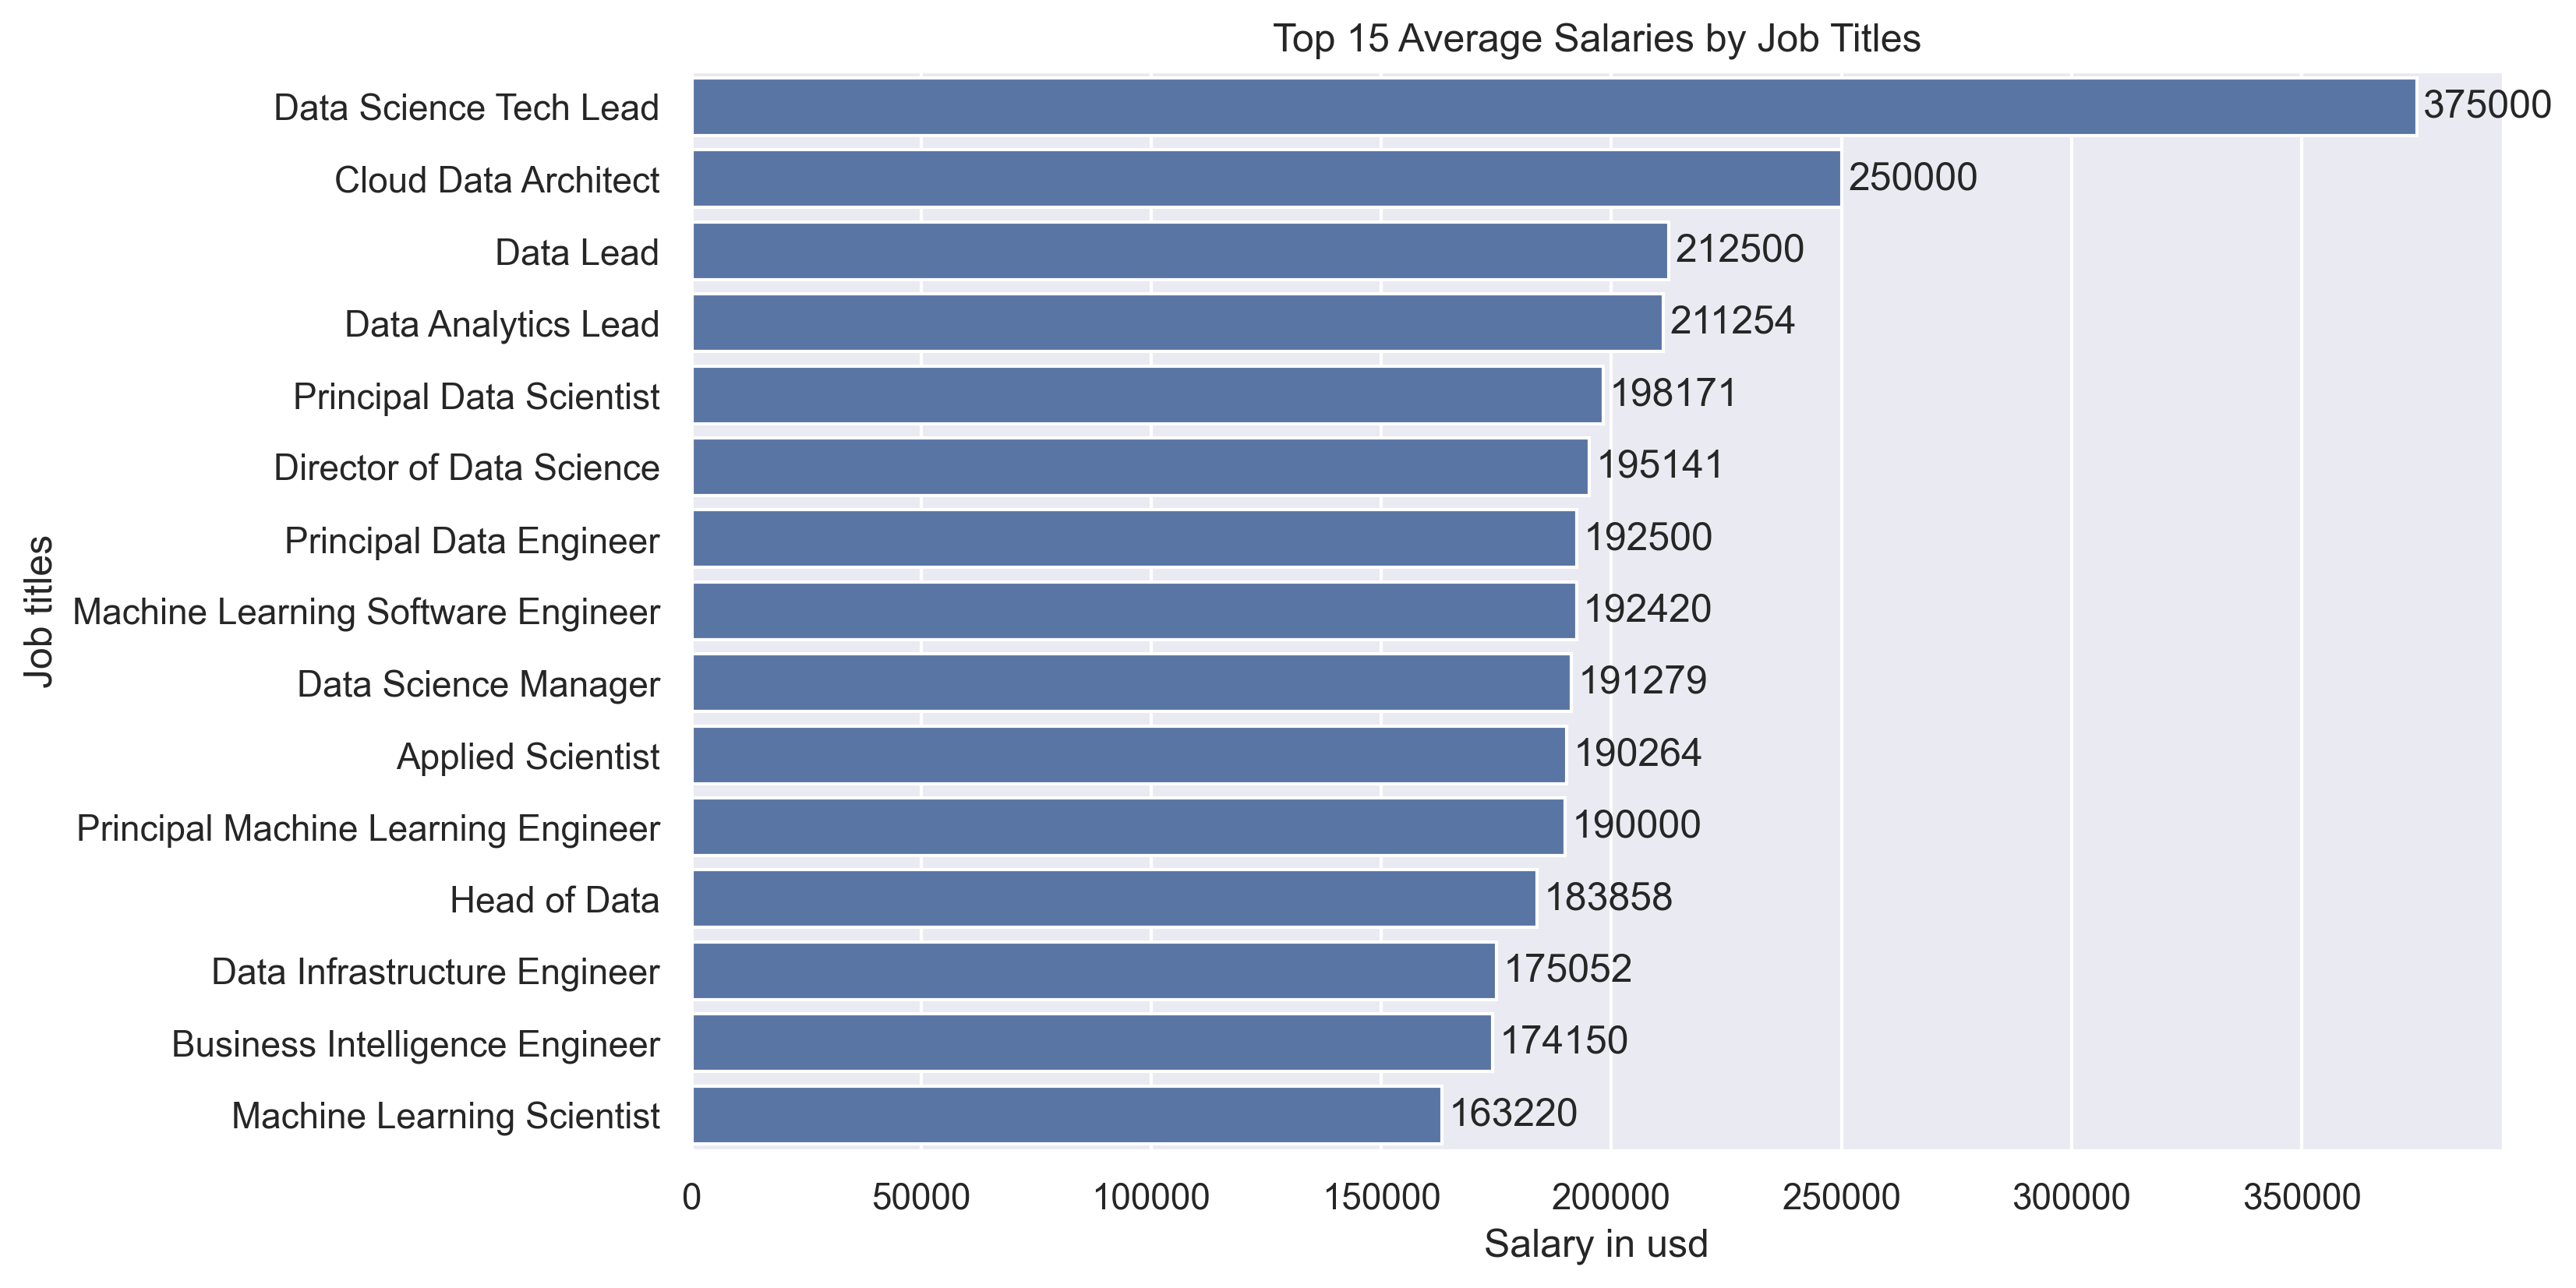

In [21]:
# Setting the figure size
plt.figure(figsize=(25,9))
# Creating graphic objects
fig, ax = plt.subplots()
# Drawing the bar plot
ax = sns.barplot(ax = ax, data = job_title_salary , y = job_title_salary.job_title, x = job_title_salary.salary_in_usd)
# Setting the labels
ax.set(ylabel='Job titles',xlabel='Salary in usd', title='Top 15 Average Salaries by Job Titles')
# Adding average salaries to the bars in the plot
ax.bar_label(ax.containers[0], padding = 2)

In [22]:
# Grouping and filtering
avg_salaries = df.groupby('employment_type')['salary_in_usd'].mean().round(0).sort_values(ascending = False).reset_index()
avg_salaries

,employment_type,salary_in_usd
0,Full-Time,138314.0
1,Contract,113447.0
2,Freelance,51808.0
3,Part-Time,39534.0


[Text(0, 2, '149367'),
 Text(0, 2, '27750'),
 Text(0, 2, '50000'),
 Text(0, 2, '17779')]

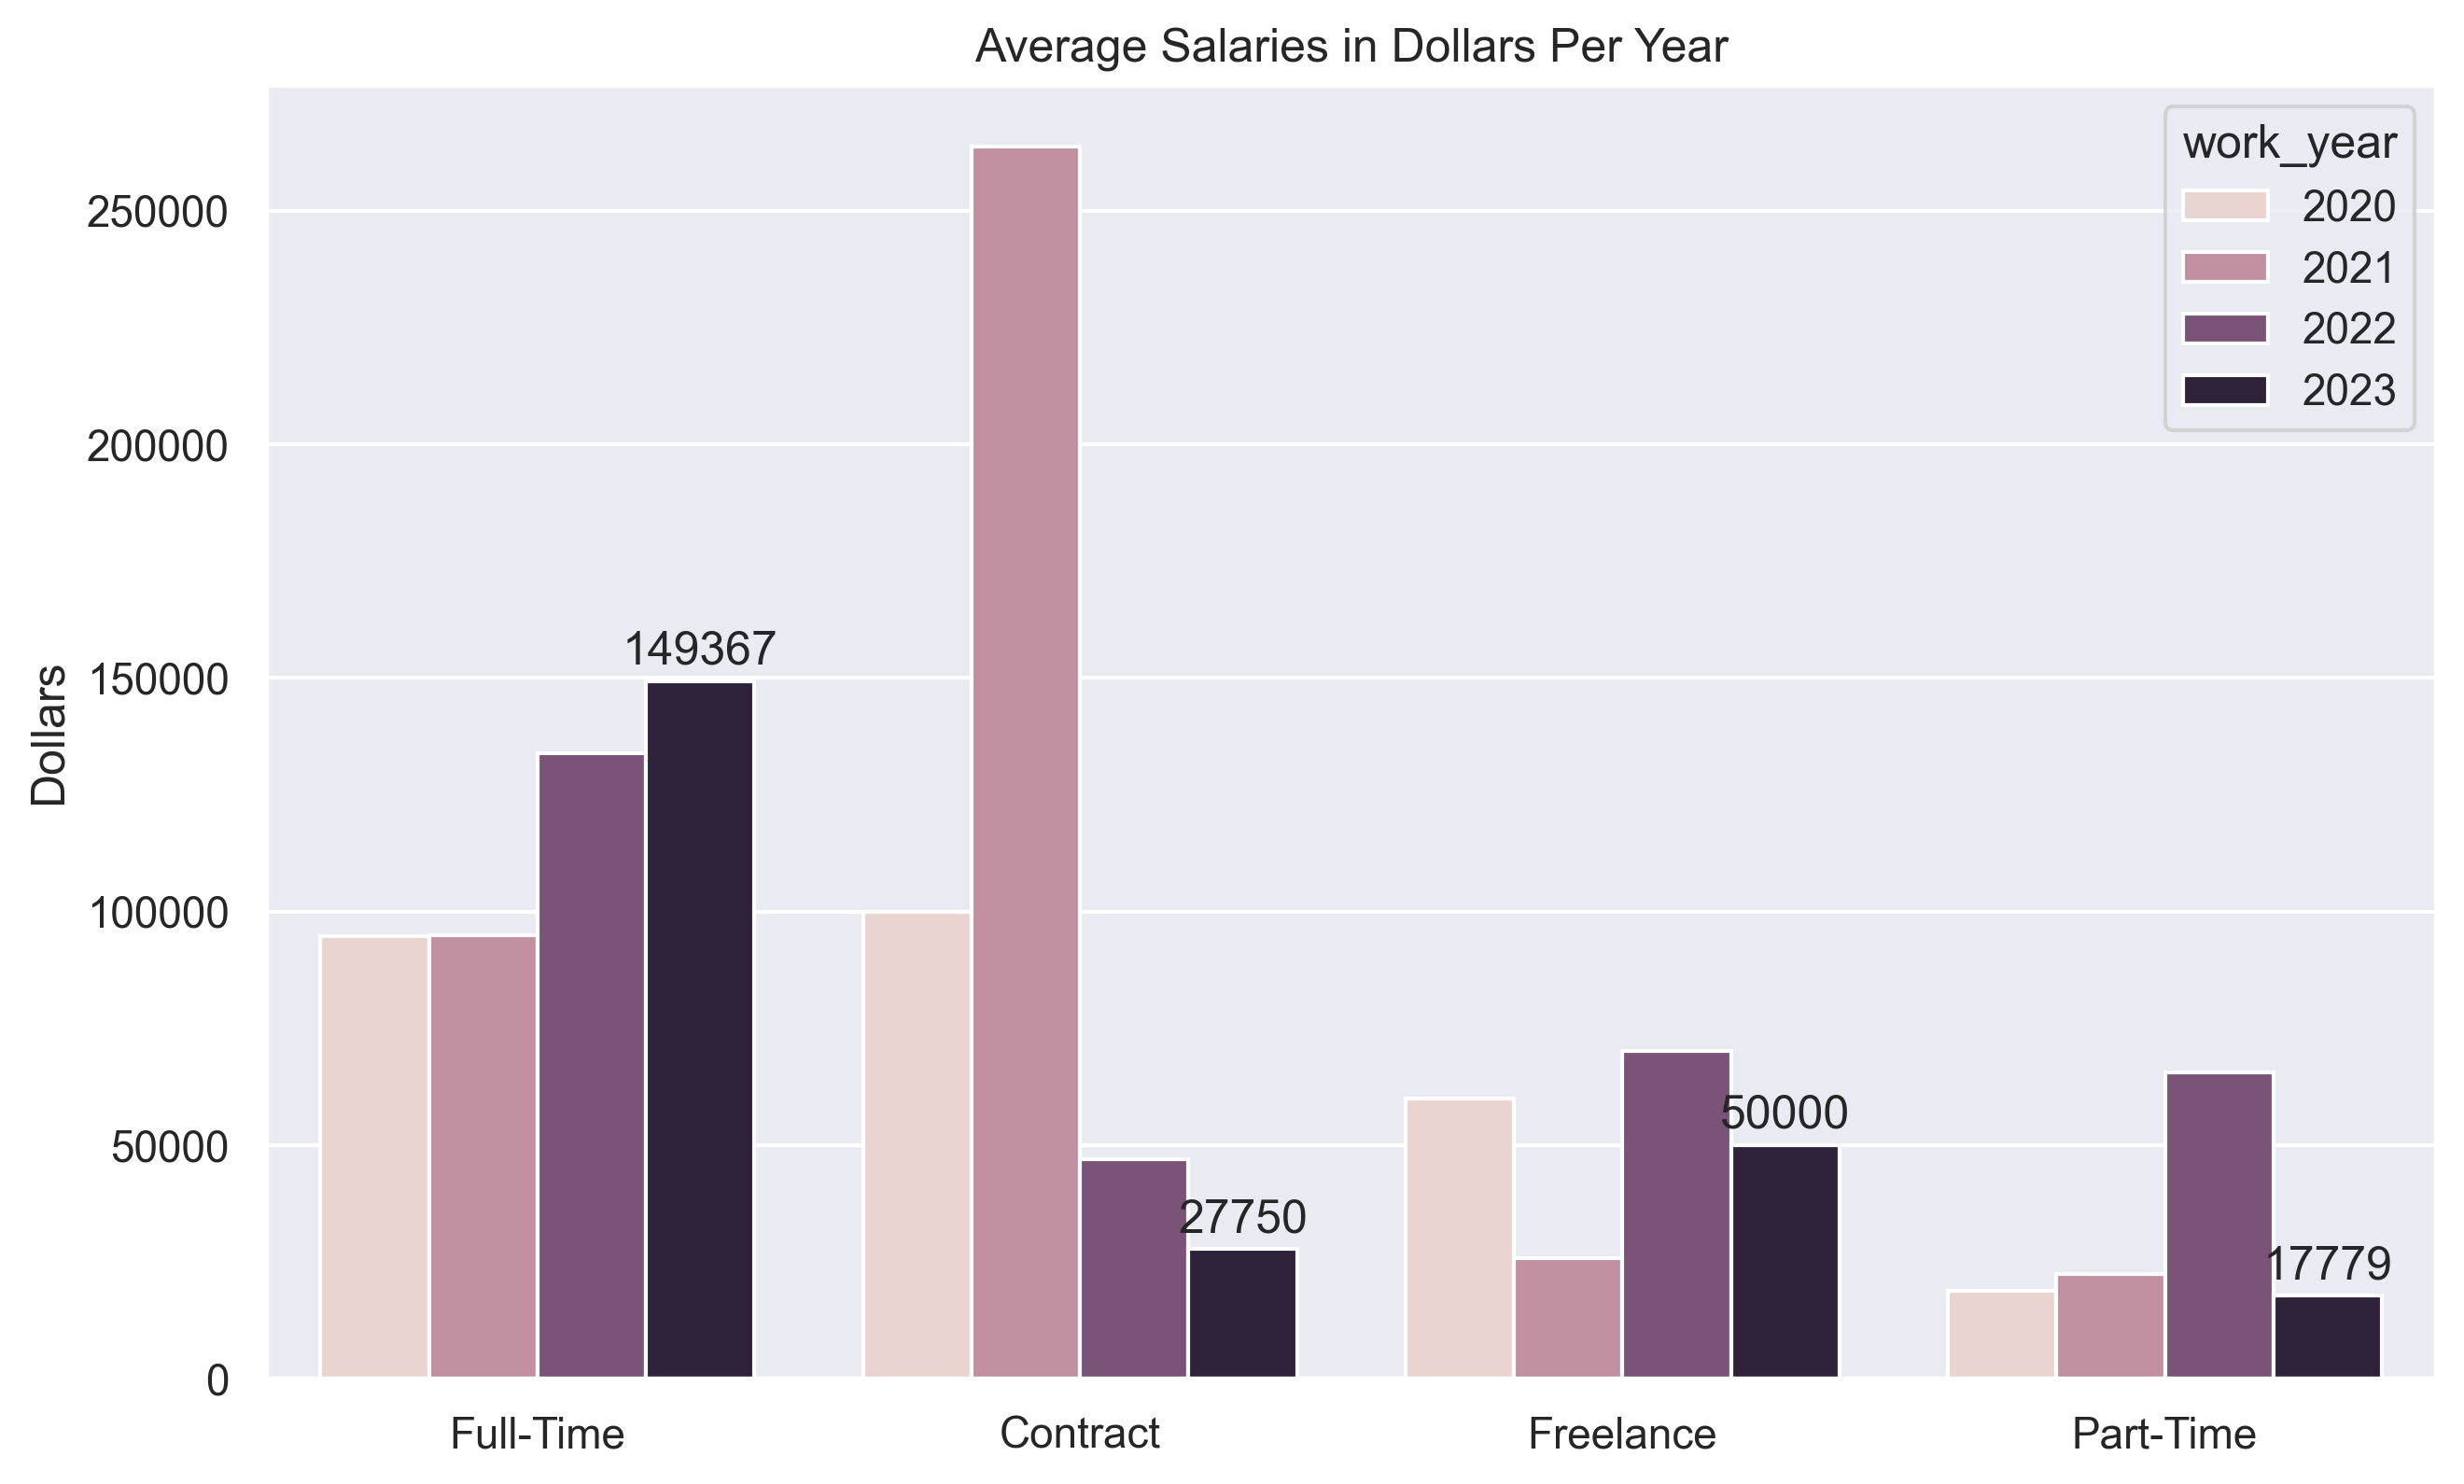

In [23]:
# Creating graphic objects
fig, ax = plt.subplots()
# Drawing the bar plot
sns.barplot(ax =ax,data = df , x = 'employment_type', y = 'salary_in_usd',errorbar = None, hue = 'work_year')
# Setting the labels
ax.set(xlabel='', ylabel='Dollars', title='Average Salaries in Dollars Per Year')
# Adding 2013 average salaries to the bars in the plot
ax.bar_label(ax.containers[3], padding = 2)

<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

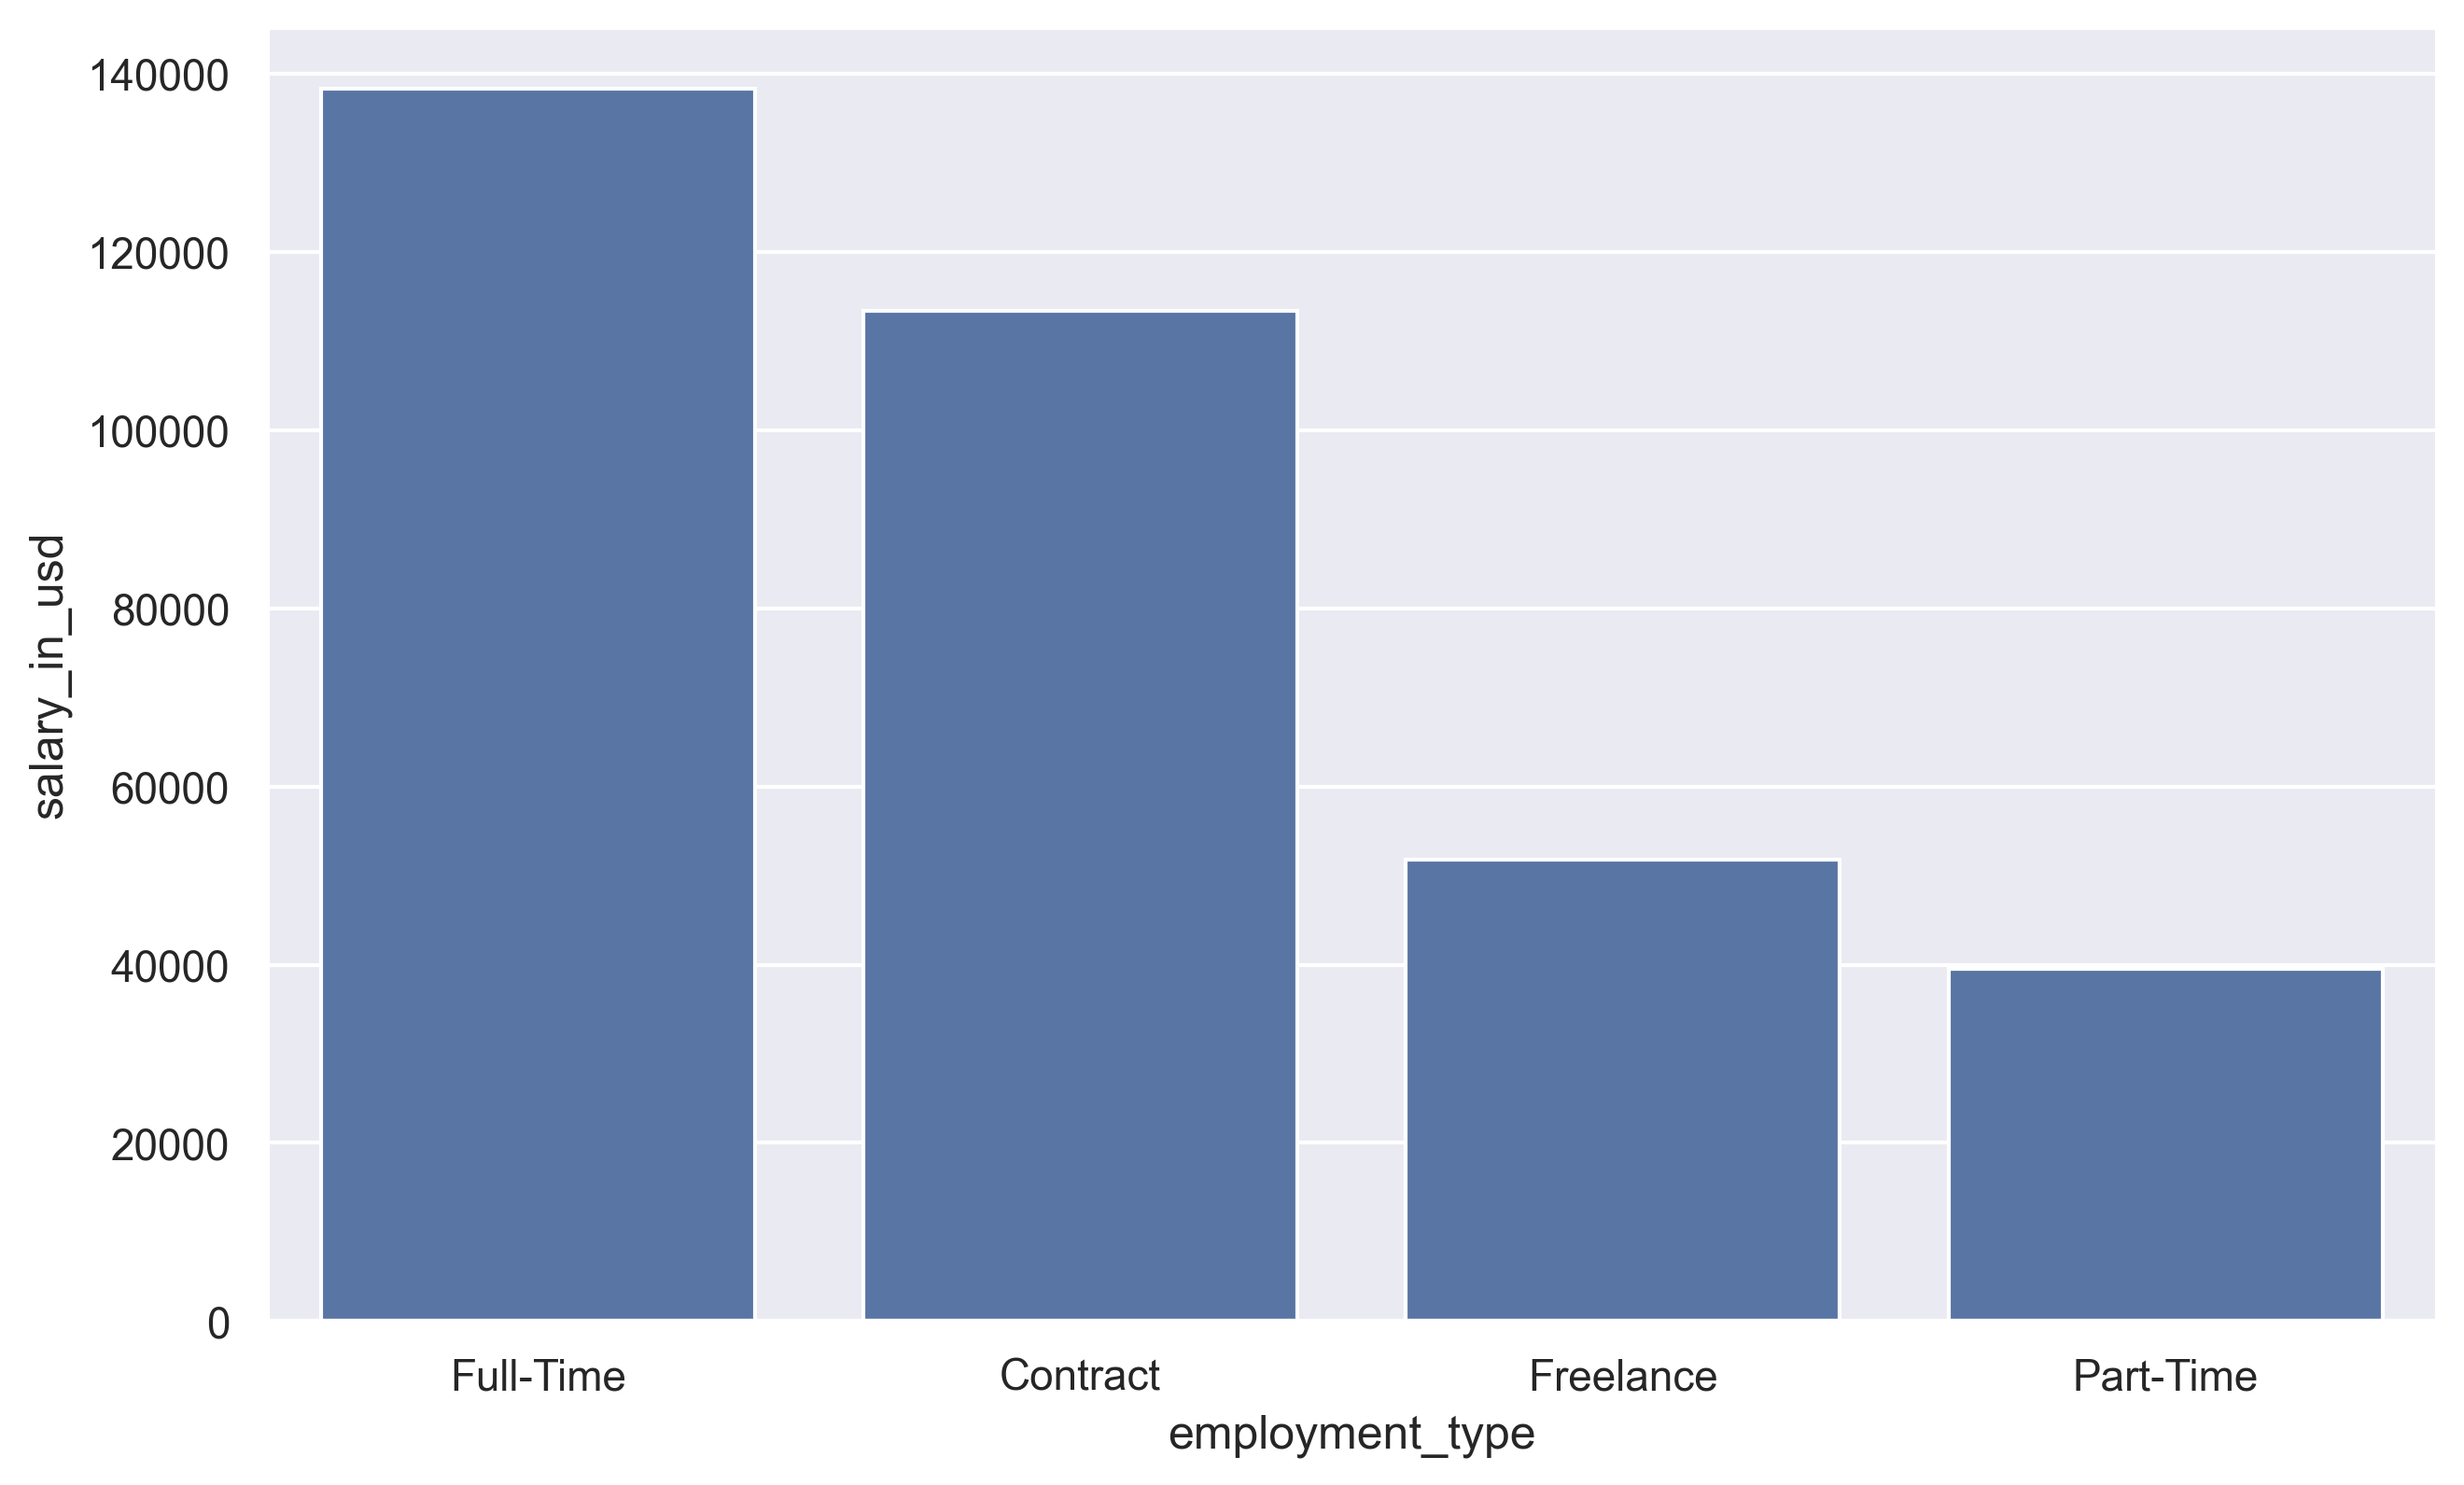

In [24]:
fig, ax = plt.subplots()
# Drawing the bar plot
sns.barplot(ax =ax,data = avg_salaries , x = 'employment_type', y = 'salary_in_usd',errorbar = None)

In [25]:
# Filtering and grouping
year_based_salary = df['salary_in_usd'].groupby(df['work_year']).mean().reset_index()
year_based_salary

,work_year,salary_in_usd
0,2020,92302.631579
1,2021,94087.208696
2,2022,133338.620793
3,2023,149045.541176


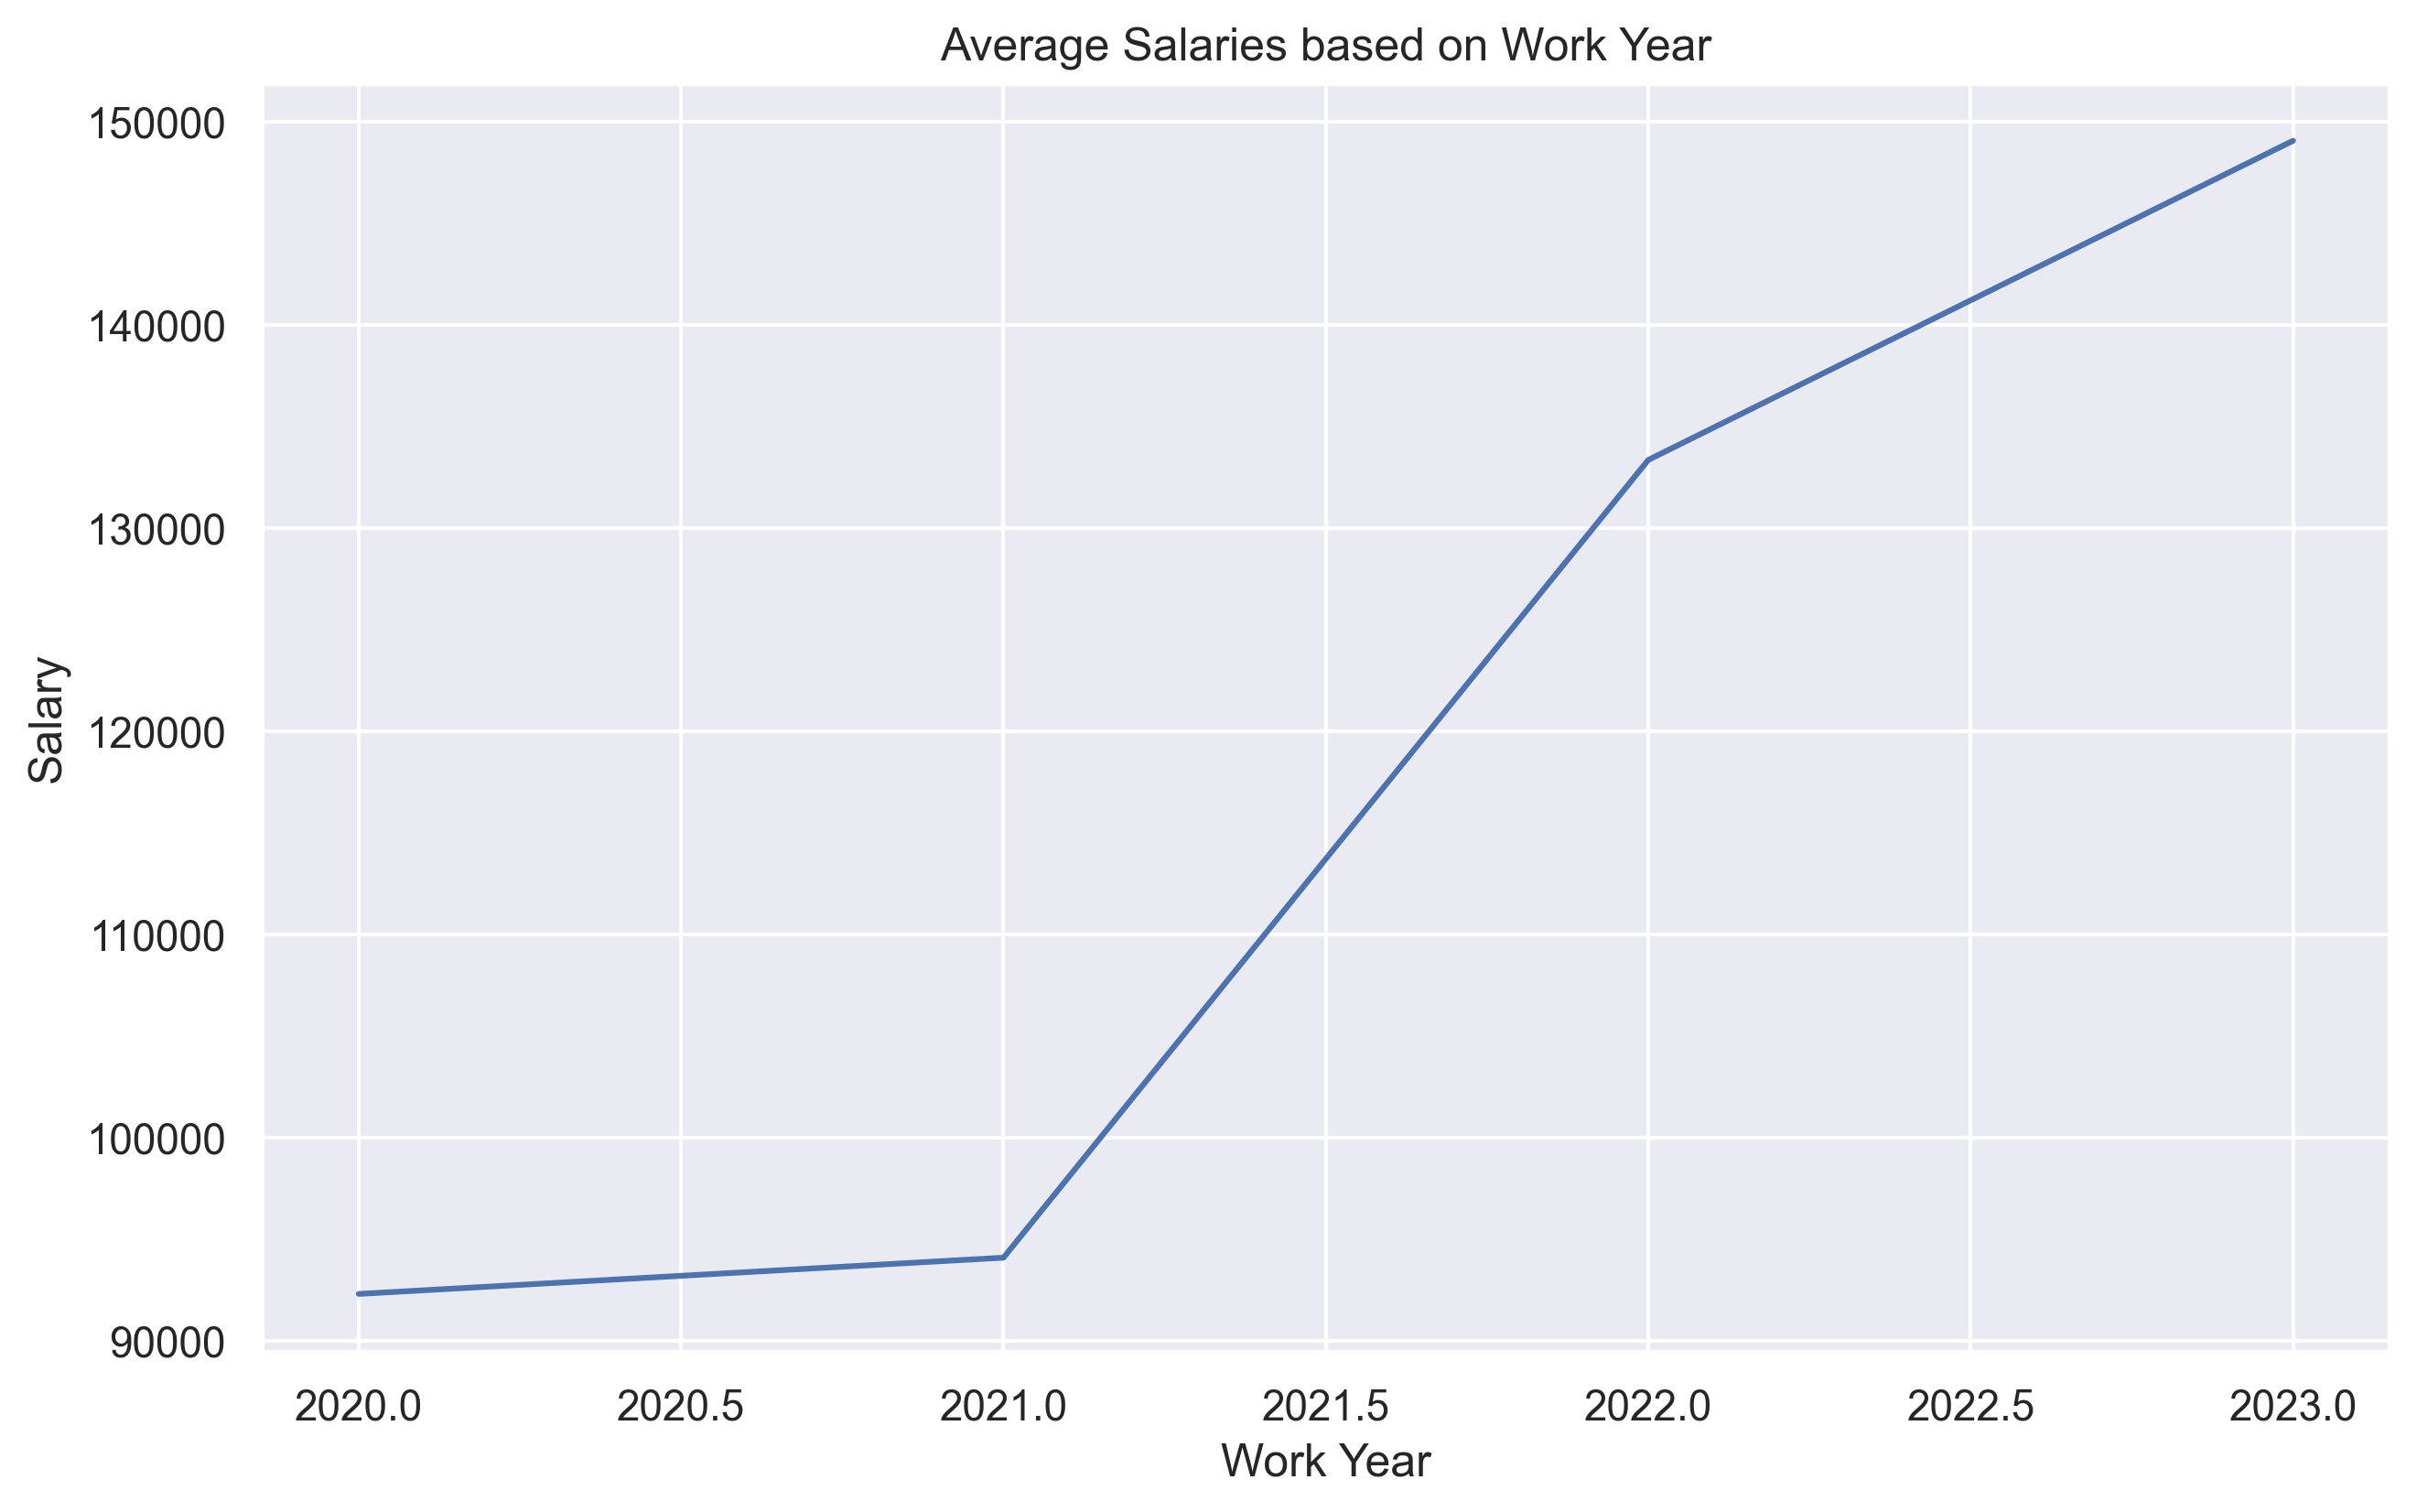

In [26]:
# Setting the labels
plt.title("Average Salaries based on Work Year")
plt.xlabel('Work Year')
plt.ylabel('Salary')
# Drawing the line plot
sns.lineplot(data = year_based_salary, x='work_year', y='salary_in_usd',)
plt.show()